In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
# define the date to fetch data
today=date.today()
d1=today.strftime('%Y-%m-%d')
end_date=d1
d2=date.today()- timedelta(days=365)
d2=d2.strftime('%Y-%m-%d')
start_date=d2




In [4]:
print("Your date between this : " , start_date,end_date )

Your date between this :  2022-07-18 2023-07-18


In [51]:
#tickers
ticker='AAPL'

df=yf.download(ticker, start=start_date, end=end_date, progress=False)
df.head()

df.to_csv('apple_stock_data.csv')

In [6]:
df.insert(0 , 'Date', df.index, True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-07-18 to 2023-07-17
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 15.7 KB


In [7]:
df.reset_index(drop=True,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-18,150.740005,151.570007,146.699997,147.070007,146.197037,81420900
1,2022-07-19,147.919998,151.229996,146.910004,151.000000,150.103699,82982400
2,2022-07-20,151.119995,153.720001,150.369995,153.039993,152.131577,64823400
3,2022-07-21,154.500000,155.570007,151.940002,155.350006,154.427887,65086600
4,2022-07-22,155.389999,156.279999,153.410004,154.089996,153.175354,66675400


In [10]:
df1=df[['Date','Close']]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-18,150.740005,151.570007,146.699997,147.070007,146.197037,81420900
1,2022-07-19,147.919998,151.229996,146.910004,151.000000,150.103699,82982400
2,2022-07-20,151.119995,153.720001,150.369995,153.039993,152.131577,64823400
3,2022-07-21,154.500000,155.570007,151.940002,155.350006,154.427887,65086600
4,2022-07-22,155.389999,156.279999,153.410004,154.089996,153.175354,66675400


In [11]:
fig=px.line(df1, x='Date', y='Close', title='Apple shares data in last one year')
fig.show()

In [12]:
fig=px.line(df, x='Date', y=df.columns, title='Apple shares data in last one year')
fig.show()

In [13]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(df):
  result=adfuller(df)
  print('ADF Statistics : %f' % result[0])
  print('p_value: %f' % result[1])
  if result[1]<=0.05:
    print('reject the null hypothesis, Data is stationary')
  else:
    print('fall to reject null hypothesis,not stationary')

check_stationarity(df['Close'])


ADF Statistics : -0.469366
p_value: 0.897857
fall to reject null hypothesis,not stationary


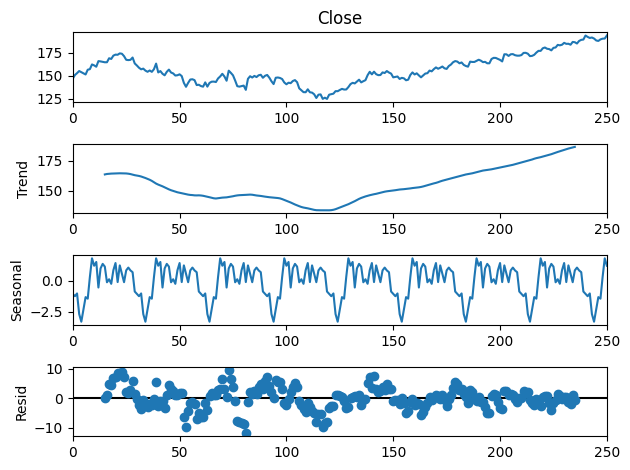

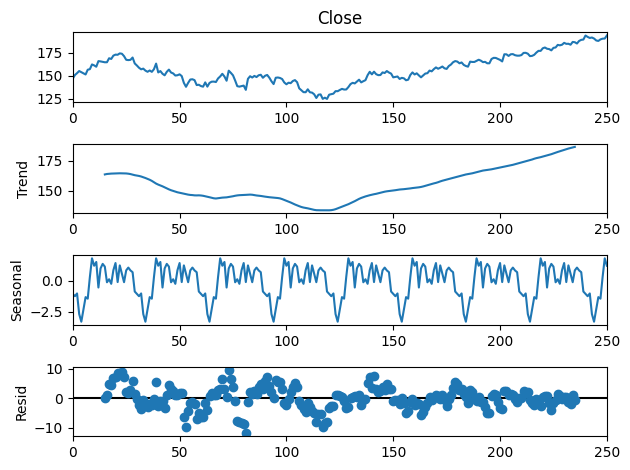

In [14]:
#decopose the data to see the trends
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(df['Close'],model='additive', period=30)
decompose.plot()

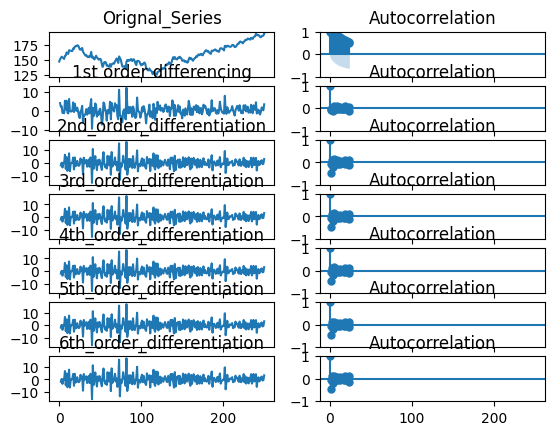

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

#orignal series
fig,axes=plt.subplots(7,2, sharex=True)
axes[0,0].plot(df['Close']);axes[0,0].set_title('Orignal_Series')
plot_acf(df['Close'], ax=axes[0,1])

# First Differencing
axes[1,0].plot(df['Close'].diff());axes[1,0].set_title('1st order differencing')
plot_acf(df['Close'].diff().dropna(),ax=axes[1,1])

# Second differentiation
axes[2,0].plot(df['Close'].diff().diff());axes[2,0].set_title('2nd_order_differentiation')
plot_acf(df['Close'].diff().diff().dropna(),ax=axes[2,1])

# Third differentiation
axes[3,0].plot(df['Close'].diff().diff());axes[3,0].set_title('3rd_order_differentiation')
plot_acf(df['Close'].diff().diff().dropna(),ax=axes[3,1])

# fourth differentiation
axes[4,0].plot(df['Close'].diff().diff());axes[4,0].set_title('4th_order_differentiation')
plot_acf(df['Close'].diff().diff().dropna(),ax=axes[4,1])

# fifth differentiation
axes[5,0].plot(df['Close'].diff().diff());axes[5,0].set_title('5th_order_differentiation')
plot_acf(df['Close'].diff().diff().dropna(),ax=axes[5,1])

# sixth differentiation
axes[6,0].plot(df['Close'].diff().diff());axes[6,0].set_title('6th_order_differentiation')
plot_acf(df['Close'].diff().diff().dropna(),ax=axes[6,1])




plt.show()

In [16]:
d=1

# Let's find p-value

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#pd.plotting.autocorrelation_plot(df['Close'])

#plot_acf(df['Close'], alpha=0.05)

from statsmodels.tsa.stattools import acf,pacf
x_acf=pd.DataFrame(acf(df['Close']))
print(x_acf)

           0
0   1.000000
1   0.973951
2   0.951127
3   0.931088
4   0.911813
5   0.897212
6   0.878777
7   0.856663
8   0.835640
9   0.814331
10  0.790606
11  0.766031
12  0.743277
13  0.722746
14  0.701334
15  0.681625
16  0.661946
17  0.642830
18  0.626520
19  0.606245
20  0.586636
21  0.566091
22  0.547096
23  0.530550


In [19]:
#p-value=3

# Let's find q-value

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



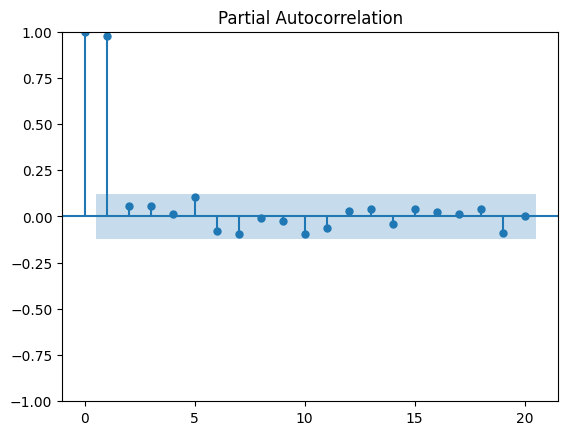

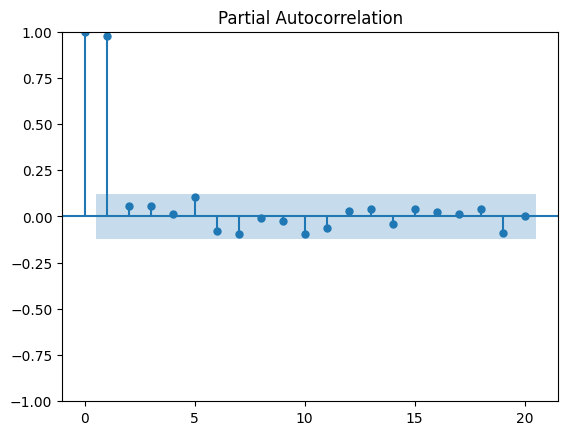

In [20]:
# partial auto-corellation
from statsmodels.tsa.stattools import acf,pacf
plot_pacf(df['Close'], lags=20, alpha=0.05)

In [21]:
# q-value=2

In [22]:
# lets define p,d,q
p=3
d=1
q=2

# Run ARIMA model with pmdarima

In [24]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.4 MB/s eta 0:00:00


In [25]:
from pmdarima.arima import auto_arima

model=auto_arima(df['Close'],start_p=2, start_q=2, max_p=5, max_q=5,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,error_actiom='ignore',suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=inf, Time=3.59 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1337.729, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1288.505, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.29 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1339.116, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1254.731, Time=0.40 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.14 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.88 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1253.426, Time=0.88 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1287.023, Time=0.47 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=3.97 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.45 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1254.575, Time=0.98 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1255.677, Time=2.14 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=1255.4

In [26]:
(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  251
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -623.713
Date:                            Tue, 18 Jul 2023   AIC                           1253.426
Time:                                    15:44:09   BIC                           1263.843
Sample:                                         0   HQIC                          1257.624
                                            - 251                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6256      0.049    -12.758      0.000      -0.722      -0.529
ar.S.L24      -0.3791      0.056     -6.741      0.000      -0.489      -0.269
sigma2        10.7633      0.776     13.866      0.000       9.242      12.285
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):                30.35
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
model=auto_arima(df['Close'],seasonal=True,suppress_warnings=True)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  251
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -609.668
Date:                Tue, 18 Jul 2023   AIC                           1221.335
Time:                        15:44:14   BIC                           1224.857
Sample:                             0   HQIC                          1222.753
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         7.6865      0.474     16.212      0.000       6.757       8.616
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                52.26
Prob(Q):                              0.65   Pr

In [40]:
from statsmodels.tsa.arima.model import ARIMA
p, d, q=3,1,2
model=ARIMA(df['Close'],order=(p,d,q))
model.fit()

# Predict the next thirty days
#forecast=model.predict(len(df['Close']), len(df['Close'])+30)
#print(forecast)


In [44]:
# Lets run SARIMA
import statsmodels.api as sm
import warnings
p, d, q=2,1,2

model=sm.tsa.statespace.SARIMAX(df['Close'],
                                order=(p,d,q),
                                seasonal_order=(p,d,q,12))
model=model.fit()
print(model.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -594.033
Date:                            Tue, 18 Jul 2023   AIC                           1206.066
Time:                                    16:10:51   BIC                           1237.317
Sample:                                         0   HQIC                          1218.661
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4850      0.480     -1.010      0.313      -1.426       0.456
ar.L2          0.2601      0.459   

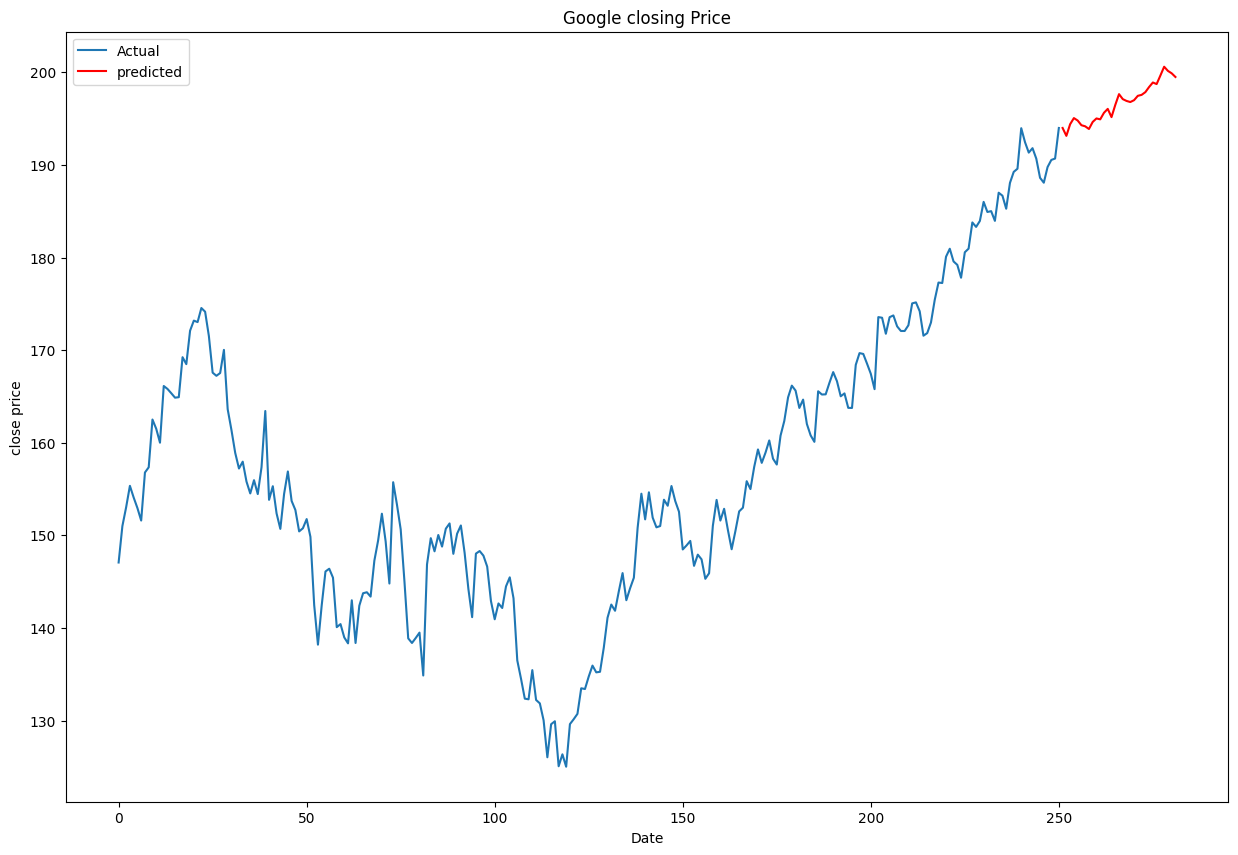

In [49]:
predictions=model.predict(start=len(df['Close']),end=len(df['Close'])+30)

plt.figure(figsize=(15,10))
plt.plot(df['Close'], label='Actual')
plt.plot(predictions, color='red', label='predicted')
plt.xlabel('Date')
plt.ylabel('close price')
plt.title('Google closing Price')
#leggend
plt.legend(loc='upper left')
plt.show()



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



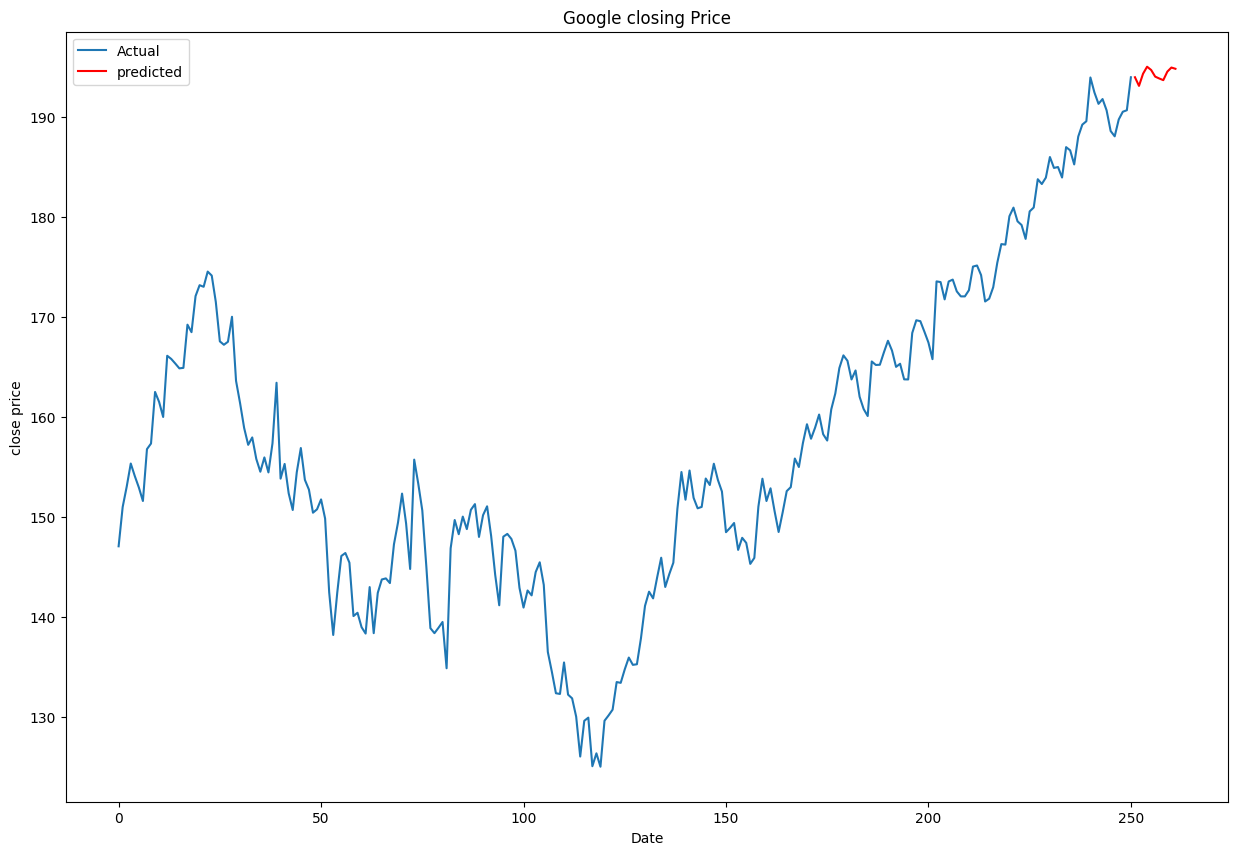

In [50]:
# Lets run SARIMA
import statsmodels.api as sm
import warnings
p, d, q=3,1,2

model=sm.tsa.statespace.SARIMAX(df['Close'],
                                order=(p,d,q),
                                seasonal_order=(p,d,q,12))
model=model.fit()

predictions=model.predict(start=len(df['Close']),end=len(df['Close'])+10)

plt.figure(figsize=(15,10))
plt.plot(df['Close'], label='Actual')
plt.plot(predictions, color='red', label='predicted')
plt.xlabel('Date')
plt.ylabel('close price')
plt.title('Google closing Price')
#leggend
plt.legend(loc='upper left')
plt.show()


